# Russia-Ukraine War Impact on Currencies

In [1]:
import tradingeconomics as te
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

In [2]:
te.login('jupyter:jupyter')

'You are logged in as a jupyter:jupyter'

In [103]:
currency_data = te.getHistoricalData(country=['russia', 'ukraine'],  indicator='currency',  initDate='2022-01-01', endDate='2022-07-01', output_type='df')

In [104]:
currency_data['DateTime'] = pd.to_datetime(currency_data['DateTime']).dt.date
ruble = currency_data.query(f'Country == "Russia"')
uah = currency_data.query(f'Country == "Ukraine"')

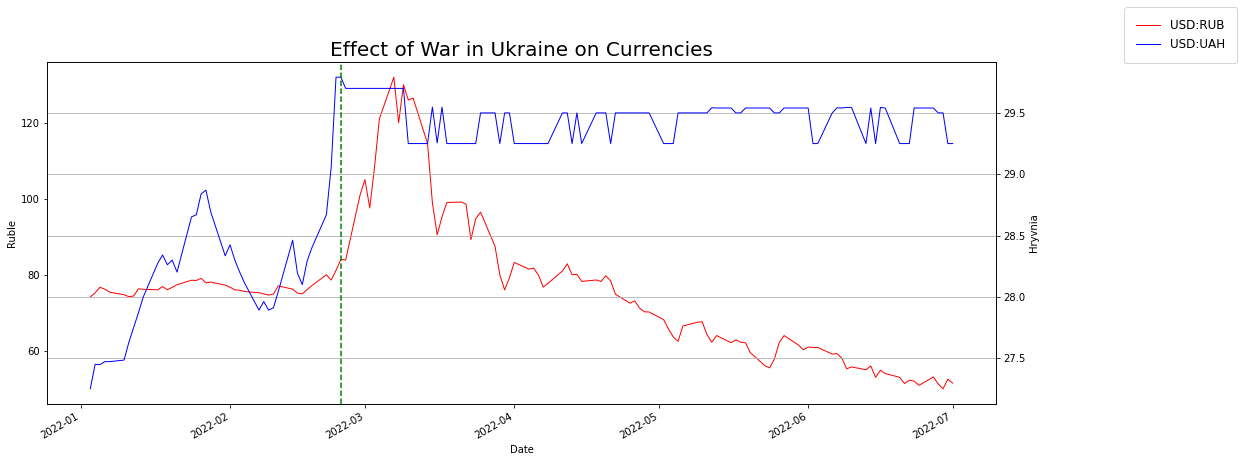

In [105]:
fig, axis_1 = plt.subplots(figsize=(17, 7))
axis_2 = axis_1.twinx()
axis_1.plot(ruble['DateTime'].values.tolist(), ruble['Value'].values.tolist(), marker='', color='red', linewidth=1, label='USD:RUB')
axis_2.plot(uah['DateTime'].values.tolist(), uah['Value'].values.tolist(), marker='', color='blue', linewidth=1, label='USD:UAH')
# setting axis labels
axis_1.set_xlabel('Date')
axis_1.set_ylabel('Ruble')
axis_2.set_ylabel('Hryvnia')
fig.legend(
          loc="upper left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=12,
          ncol=1,
          title_fontsize=14,
          borderpad=1)

plt.grid(True)
plt.title("Effect of War in Ukraine on Currencies", size=20)
plt.gcf().autofmt_xdate()
# start date of the war
plt.axvline(dt.datetime(2022, 2, 24), color='green', linestyle='--', label='War start date')
plt.show()